In [10]:
import pickle
import settings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [11]:
## Load the data to make prediction on
def read():
    df2 = pd.read_csv(settings.ASSEMBLED_DIR + "\\Test_data2.csv")
    return df2

In [12]:
def preprocess_X(df):
    
    ''' Keeps the columns needed to run the model'''
    
    df1 = df[["DEMAND","MAX_TEMP", "MIN_TEMP", "Holiday_Flag", "Weekened_Flag", "STATE_VIC"]]
    Data = df1.loc[df['STATE_VIC']==1, ["DEMAND","MAX_TEMP", "MIN_TEMP", "Holiday_Flag", "Weekened_Flag"]]
    Data.reset_index(inplace = True)
    X = Data.loc[:, ["MAX_TEMP", "MIN_TEMP", "Holiday_Flag", "Weekened_Flag"]]   
    scale = StandardScaler()
    X_scale = scale.fit_transform(X)
    return X_scale

In [37]:
def make_predict(X):
    file = open('RandomForest.pkl', 'rb')
    model = pickle.load(file)
    y_pred = model.predict(X)
    return y_pred

def make_plot(Y_pred, n):
    plt.figure(figsize=(20,5))
    plt.plot(Y_pred[0:n])

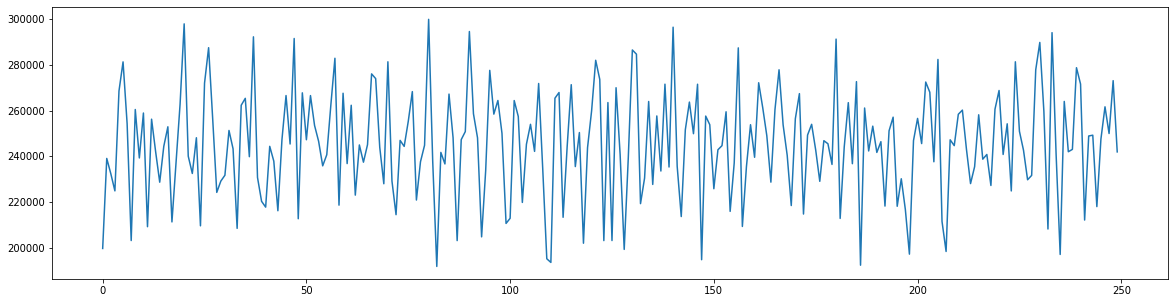

In [38]:
## Load the model and pass the data, get predicted values
df = read()
X = preprocess_X(df)
Y_pred = make_predict(X)
make_plot(Y_pred, 250)